## ***Answer 2.2:***

In [82]:
p=2+2+4+5+3

In [83]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

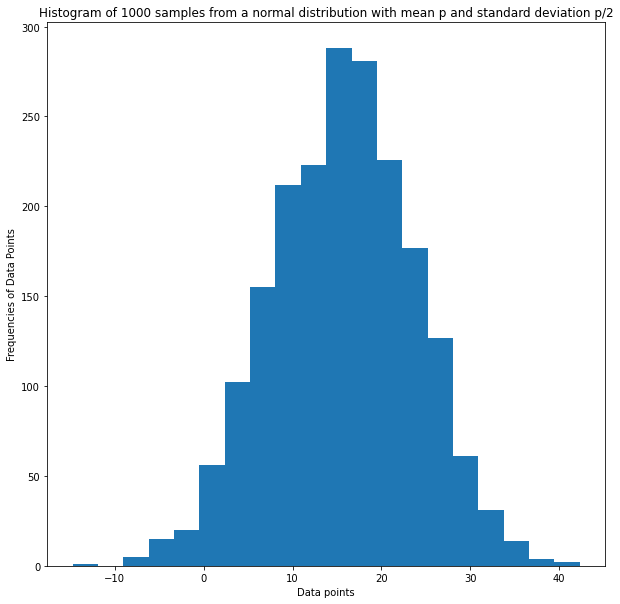

In [84]:
plt.figure(figsize=(10,10));
plt.hist(np.random.normal(p, p/2, 2000),bins=20);
plt.title('Histogram of 1000 samples from a normal distribution with mean p and standard deviation p/2');
plt.xlabel('Data points');
plt.ylabel('Frequencies of Data Points');

## ***Answer 2.3:***

In [85]:
def prior(sigma):
  c=0
  if sigma > 0:
    c=1
  return c

## ***Answer 2.4:***

In [86]:
def transition(mu,sigma):
  return [mu,np.random.normal(sigma,1)]

## ***Answer 2.5:***

$\text{Here, taking logarithm is useful because it reduces the computation by converting multiplication into addition, and since log is a monotonic function therefore} \\ \text{montonicity of likelihood function doesn't change even after taking log.}$

In [87]:
def log_like(D,mu,sigma):
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
  return c

## ***Answer 2.6:***

In [88]:
def acceptance(updated_theta,old_theta):
  a = False
  accept=np.random.uniform(0,1)
  if updated_theta>old_theta:
    a = True
  elif accept < (np.exp(updated_theta-old_theta)):
    a = True
  return a

## ***Answer 2.7:***

In [89]:
def metropolis(mu,sigma,iter,D):
  accepted = []
  accepted1 = []
  rejected = []
  rejected1 = []
  for i in range(iter):
    x = transition(mu,sigma)
    a_old = log_like(D,mu,sigma)
    a_new = log_like(D,x[0],x[1])
    if (acceptance(a_new+np.log(prior(x[1])),a_old+np.log(prior(sigma)))):
      accepted.append(x[1])
      accepted1.append(i)
      mu,sigma = x[0],x[1]
    else:
      rejected.append(x[1])
      rejected1.append(i)
  return accepted, accepted1, rejected, rejected1

In [90]:
D=np.random.normal(p, p/2, 1000)
a,b,c,d = metropolis(p,0.1,500,D)
a1,b1,c1,d1 = metropolis(p,0.1,50000,D)

<ipython-input-87-145f8c570926>:2: RuntimeWarning: invalid value encountered in log
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
<ipython-input-89-7ab8915c7dc5>:10: RuntimeWarning: divide by zero encountered in log
  if (acceptance(a_new+np.log(prior(x[1])),a_old+np.log(prior(sigma)))):


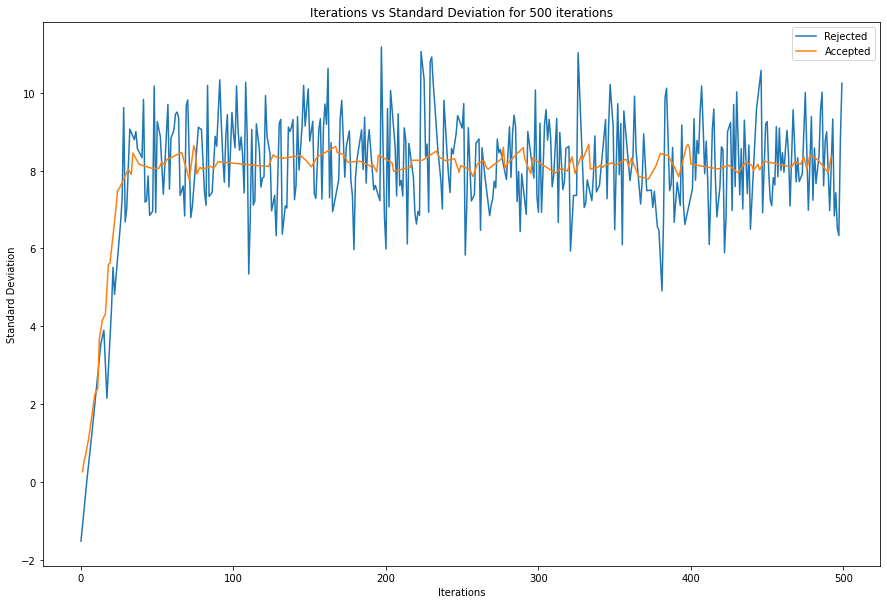

In [91]:
plt.figure(figsize=(15,10));
plt.plot(d,c);
plt.plot(b,a);
plt.legend(['Rejected','Accepted']);
plt.title('Iterations vs Standard Deviation for 500 iterations');
plt.xlabel('Iterations');
plt.ylabel('Standard Deviation');

**Observation:** The above graph is of Accepted values and Rejected values of $σ$ for first 500 iterations. In the above plot we can see that accepted value of $σ$ quickly converges to the value 8 as was taken to generate the data initially.

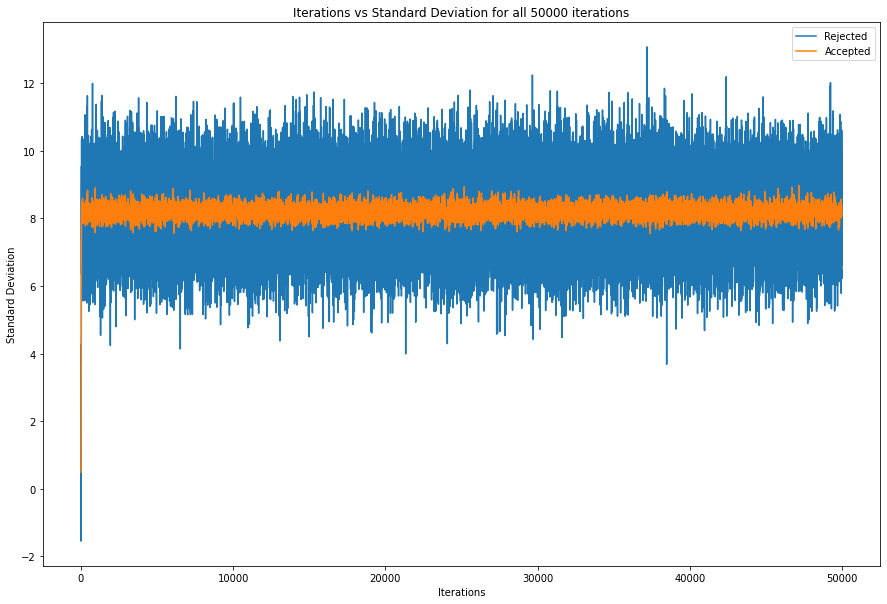

In [92]:
plt.figure(figsize=(15,10))
plt.plot(d1,c1,label='Rejected')
plt.plot(b1,a1,label='Accepted')
plt.legend(['Rejected','Accepted'])
plt.title('Iterations vs Standard Deviation for all 50000 iterations')
plt.xlabel('Iterations')
plt.ylabel('Standard Deviation')
plt.show()

**Observations:** The above graph is of Accepted values and Rejected values of $σ$ for all 50000 iterations. In the above graph the accepted value of $σ$ is converging to 8(=p/2).

## ***Answer 2.8:***

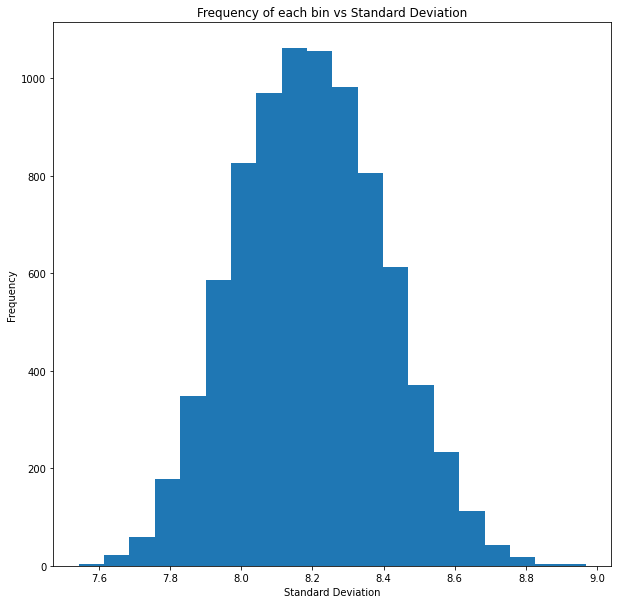

In [93]:
plt.figure(figsize=(10,10))
a2 = a1[int(0.25*len(a1)):]
plt.hist(a2,bins = 20)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Standard Deviation')
plt.show()

**Observations:** Dropping the first few iterations makes sense as the process takes some time initially to warm up till it reaches the steady state as also observed from the two graphs.

## ***Answer 2.9:***

In [94]:
def prior_1(mu,sigma):
  c = 0
  if mu>=p/2 and mu<=(3*p/2):
    if sigma>0:
      c = 1/p
  return c

In [95]:
def transition_1(mu,sigma):
  c = np.random.multivariate_normal((mu,sigma),np.identity(2))
  return c

In [96]:
def log_like(D,mu,sigma):
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
  return c

In [97]:
def metropolis_1(mu,sigma,iter,D):
  acceptedmu = []
  acceptedsigma = []
  for i in range(iter):
    x = transition_1(mu,sigma)
    a_old = log_like(D,mu,sigma)
    a_new = log_like(D,x[0],x[1])
    if (acceptance(a_new+np.log(prior_1(x[0],x[1])),a_old+np.log(prior_1(mu,sigma)))):
      acceptedmu.append(x[0])
      acceptedsigma.append(x[1])
      mu,sigma = x[0],x[1]
  return acceptedmu, acceptedsigma

## ***Answer 2.10:***

In [98]:
a1,b1 = metropolis_1(p/2,0.1,50000,D)
a2 = a1[int(0.25*len(a1)):]
b2 = b1[int(0.25*len(b1)):]

<ipython-input-96-145f8c570926>:2: RuntimeWarning: invalid value encountered in log
  c = np.sum(-np.log(sigma * np.sqrt(2* np.pi) )-((D-mu)**2) / (2*sigma**2))
<ipython-input-97-a3b6404bd6b6>:8: RuntimeWarning: divide by zero encountered in log
  if (acceptance(a_new+np.log(prior_1(x[0],x[1])),a_old+np.log(prior_1(mu,sigma)))):


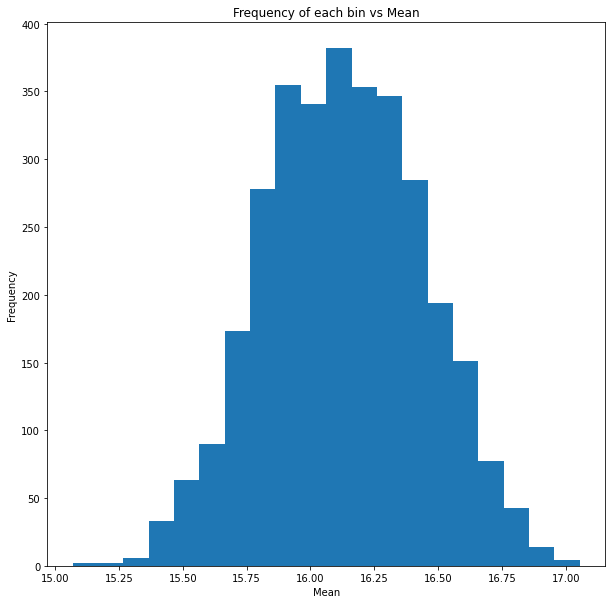

In [99]:
plt.figure(figsize=(10,10))
plt.hist(a2,20)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Mean')
plt.show()

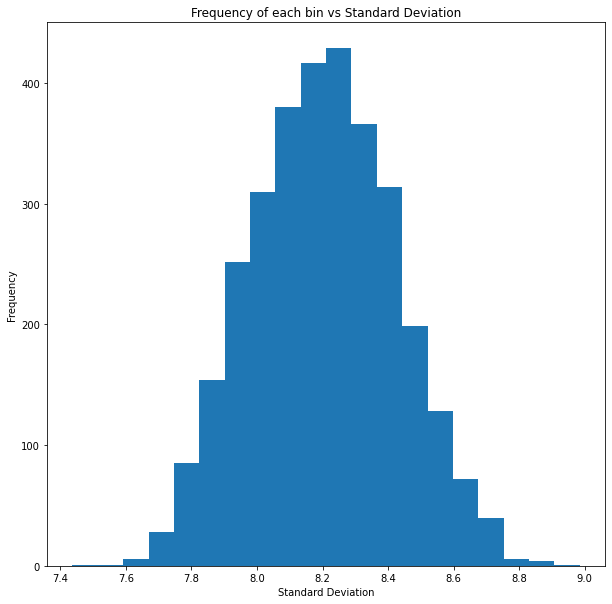

In [100]:
plt.figure(figsize=(10,10))
plt.hist(b2,20)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Frequency of each bin vs Standard Deviation')
plt.show()